# Wykorzystanie biblioteki DEAP w problemie optymalizacji parametrów klasyfikatorów oraz selekcji cech

### I Optymalizacja parametrów klasyfikatorów

In [281]:
# data manipulation tools
import pandas as pd
import numpy as np

# Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
from sklearn.linear_model import LinearRegression

# Epsilon-Support Vector Regression
from sklearn import svm 

# model selection
from sklearn.model_selection import cross_val_score # perform cross-validation for estimator evaluation
from sklearn.model_selection import cross_val_predict # generate cross-validated estimates for each input
from sklearn.model_selection import train_test_split # splits arrays/matrices into random train and test subsets
from sklearn.model_selection import GridSearchCV # determines estimator paremeters values
from sklearn.model_selection import StratifiedKFold # stratified k-fold cross-validator
from sklearn.model_selection import KFold # k-fold cross-validator

# model evaluation
from sklearn.metrics import mean_absolute_error, median_absolute_error

# feature selection based on weights importance
from sklearn.feature_selection import SelectFromModel

# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# rest
import random


In [282]:
# loading data
import pandas as pd

%store -r predictors_x
%store -r outcomes_y

predictors_x.head()

,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,landMax_2_PriorYear,landMax_5_PriorYear,landMin_4_PriorYear,land&OceanAvg_1_PriorYear,land&OceanAvg_2_PriorYear,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_5_PriorYear
date,,,,,,,,,,,,
1850-01-01,-1.344498,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.177569,-1.176354,1.528022,1.528980,1.529537
1851-01-01,-1.344498,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.177569,-1.176354,1.528022,1.528980,1.529537
1852-01-01,-1.439527,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.543883,-1.176354,1.233484,1.528980,1.529537
1853-01-01,-1.452432,-1.438803,-1.342076,-1.341202,-1.250940,-1.403688,-1.277205,-1.554889,-1.543128,1.248574,1.234485,1.529537
1854-01-01,-1.590870,-1.451711,-1.437103,-1.341202,-1.361717,-1.403688,-1.277205,-1.624064,-1.554147,1.479957,1.249573,1.529537


In [283]:
outcomes_y.head()

,landAvg
date,
1850-01-01,-1.834912
1851-01-01,-1.440372
1852-01-01,-1.453273
1853-01-01,-1.591667
1854-01-01,-1.710123


In [284]:
x_train, x_test, y_train, y_test = train_test_split(predictors_x, outcomes_y, test_size=0.1, random_state=0)

In [285]:
x_train.shape, y_train.shape

((1792, 12), (1792, 1))

In [286]:
x_test.shape, y_test.shape

((200, 12), (200, 1))

In [287]:
# Preprocessing
numberOfAtributtes= len(x_train.columns)
print(numberOfAtributtes)

12


In [341]:
# Regression using SVC with default parameters and 5x K-fold cross validation for all 45 features
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

y=y_train.values.ravel()
df = df_norm=x_train.values

regr = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=None, min_samples_split=16,
                             min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='auto')
regr.fit(df, y)
scores=regr.score(x_test, y_test.values.ravel())
print(scores.mean())

0.9899484470163238


In [289]:
# Generationg new individual
import random
def parametersRFR(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = [10, 20, 50, 100, 200, 500, 1000]
    genome.append(n_estimators[random.randint(0,6)])
    
    # criterion
    criterion = ['mse', 'mae']
    genome.append(criterion[random.randint(0, 1)])
    
    # max_depth
    max_depth = None
    depths=[1,2,4,8,16,32]
    if random.uniform(0,1) > 0.5: max_deph = depths[random.randint(0, 5)]
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    samples_splits = [4, 8, 16, 32]
    if random.uniform(0,1) > 0.5: min_samples_split = samples_splits[random.randint(0, 3)]
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    samples_leafs = [4, 8, 16, 32]
    if random.uniform(0,1) > 0.5: min_samples_leaf = samples_leafs[random.randint(0, 3)]
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])

    return icls(genome)

In [290]:
# Mutation
def mutationRFR(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = [10, 20, 50, 100, 200, 500, 1000]
        individual[numberParamer]=n_estimators[random.randint(0, 6)]
    elif numberParamer==1:    
        # criterion
        criterion = ['mse', 'mae']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        max_depth = None
        depths=[1,2,4,8,16,32]
        if random.uniform(0,1) > 0.5: max_deph = depths[random.randint(0, 5)]
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        samples_splits = [4, 8, 16, 32]
        if random.uniform(0,1) > 0.5: min_samples_split = samples_splits[random.randint(0, 3)]
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        samples_leafs = [4, 8, 16, 32]
        if random.uniform(0,1) > 0.5: min_samples_leaf = samples_leafs[random.randint(0, 3)]
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]

In [291]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

def parametersFitnessRFR(y,df,numberOfAtributtes,individual):
    split=5
    kf = KFold(n_splits=split)
    df_norm = df

    estimator = RandomForestRegressor(n_estimators=individual[0], criterion=individual[1], 
                                       max_depth=individual[2],min_samples_split=individual[3], 
                                       min_samples_leaf=individual[4], min_weight_fraction_leaf=individual[5], 
                                       max_features=individual[6], n_jobs=-1)
    resultSum = 0
    counter = 0
    for train, test in kf.split(df_norm):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        resultSum=estimator.score(df_norm[test], y[test])
        counter+=1
    return resultSum/counter,

In [292]:
from deap import base, creator, tools
import random
from math import sin
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [293]:
sizePopulation = 100
probabilityMutation = 0.2
probabilityCrossover = 0.8
numberIteration = 10
numberElitism = 100

In [294]:
def configureDeap(fitness, parameters, mutation,
                  selection_param={'function':tools.selTournament, 'tournsize':3},
                 mate_params={'function':tools.cxTwoPoint},):
    
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox() 
    toolbox.register('individual', parameters, numberOfAtributtes, creator.Individual)
    toolbox.register('evaluate', fitness,y,df,numberOfAtributtes)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('select', **selection_param)
    toolbox.register('mate', **mate_params)
    toolbox.register('mutate', mutation)

    return toolbox

In [295]:
def mutate(toolbox, offspring):
    for mutant in offspring:
        # mutation
        if random.random() < probabilityMutation:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    return offspring

In [296]:
def setIndividualFitnessValue(individuals, fitnesses):
    for ind, fit in zip(individuals, fitnesses):
        ind.fitness.value = [fit]
    return individuals

In [297]:
def initPopulation(toolbox):
    population = toolbox.population(n=sizePopulation)
    fitnesses = list(map(toolbox.evaluate, population))
    population = setIndividualFitnessValue(population, fitnesses)
    return population

In [298]:
def crossover(toolbox, offspring):
    # [::2] - gets only individuals with odd indexes
    # [1::2] -  gets only individuals with even indexes
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # crossover
        if random.random() < probabilityCrossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    return offspring

In [299]:
def evaluate(toolbox, offspring, verbose=0):
    # evaluate new individuals
    new_individuals = [ind for ind in offspring if not ind.fitness.valid]
    new_fitnesses = map(toolbox.evaluate, new_individuals)
    for ind, fit in zip(new_individuals, new_fitnesses):
        ind.fitness.values = fit
    
    if verbose>3:
        print('Ewaluated %i individuals'%len(new_individuals))
    return offspring

In [300]:
def getBestsForElitism(population):
    listElitism = []
    for x in range(0, numberElitism):
        listElitism.append(tools.selBest(population, 1)[0])
    return listElitism

In [301]:
def calculateStatistics(population,verbose=0):
    fits = [ind.fitness.values[0] for ind in population]
    length = len(population)
    mean = sum(fits)/length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2/length-mean **2)**0.5
    if verbose>2:
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    return (mean, std)

In [302]:
def pickBestIndividual(population, verbose=0):
    best_ind = tools.selBest(population, 1)[0]
    if verbose>1:
        print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return best_ind

In [303]:
def plotSimple(y_vals=[], label_y='y', label_x='x', title='plot', instance_info='no_info', save_location='./plots/'):
    filename = save_location + title+'_'+ instance_info +'.png'
    x_vals = [x for x in range(len(y_vals))]
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
#     plt.savefig(filename)
    plt.show()
    plt.close()

In [304]:
def plotResults(stats):
    plotSimple([best[0].fitness.values[0] for best in stats], 'best', 'epoch', 'fitness(iteration)')
    plotSimple([best[1] for best in stats], 'mean', 'epoch', 'mean(iteration)')
    plotSimple([best[2] for best in stats], 'std', 'epoch', 'std(iteration)')
    plotSimple([best[3] for best in stats], 'duration', 'epoch', 'epoch_duration(iteration)')

In [305]:
def startOptimizationLoop(toolbox, population, elitism=False, verbose=0):
    stats = []
    g = 0
    while g < numberIteration:
        g = g + 1
        if verbose>0:
            print('-- Generation %i --' % g)
        start = timer()  
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        elite = getBestsForElitism(offspring) if elitism else []
        
        offspring = crossover(toolbox, offspring)
        offspring = mutate(toolbox, offspring)
        offspring = evaluate(toolbox, offspring)
        duration = timer()-start
        
        population[:] = offspring + elite

        mean, std = calculateStatistics(population, verbose)
        best_ind = pickBestIndividual(population, verbose)
        stats.append((best_ind, mean, std, duration))
    
    if verbose>-1:
        best_overall = pickBestIndividual(population, verbose)
        print('Best found individual: (x1,x2) =', best_overall, ', y =', best_overall.fitness.values[0])
    return stats

In [306]:
def run(fitness, parameters, mutation, selection, mate, elitism, verbose):
    toolbox = configureDeap(fitness, parameters, mutation, selection, mate)
    population = initPopulation(toolbox)
    stats = startOptimizationLoop(toolbox, population, elitism, verbose)
    plotResults(stats)

C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Min 0.16719420662271514
  Max 0.19815726815892426
  Avg 0.19648378549896245
  Std 0.006720196278336469
Best individual is [200, 'mae', None, 2, 2, 0.0, 'auto'], (0.19815726815892426,)
-- Generation 2 --
  Min 0.19802709969597887
  Max 0.19815864277031972
  Avg 0.19809859987041065
  Std 4.1635797973873696e-05
Best individual is [100, 'mse', None, 16, 2, 0.0, 'auto'], (0.19815864277031972,)
-- Generation 3 --
  Min 0.17162485107665273
  Max 0.19817446743826134
  Avg 0.19679927449237122
  Std 0.005775536532255416
Best individual is [500, 'mae', None, 4, 2, 0.0, 'auto'], (0.19817446743826134,)
-- Generation 4 --
  Min 0.19808651606091152
  Max 0.1981768501705087
  Avg 0.19814248364084003
  Std 2.07447749961114e-05
Best individual is [1000, 'mse', None, 16, 2, 0.0, 'auto'], (0.1981768501705087,)
-- Generation 5 --
  Min 0.1981011571947751
  Max 0.19818711225458835
  Avg 0.1981464701816245
  Std 2.68975985913834e-05
Best individual is [1000, 'mse', None, 16, 2, 0.0, 'aut

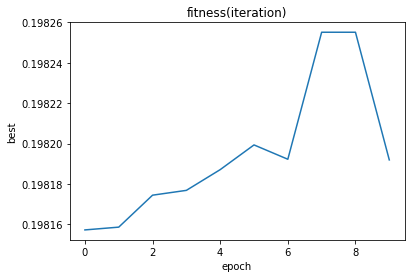

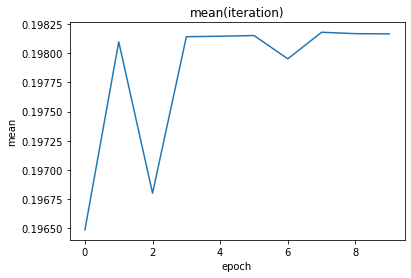

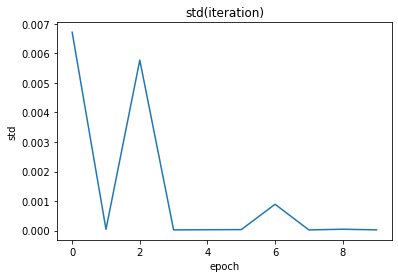

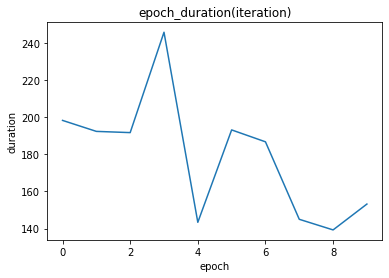

In [267]:
# scenario 0 (tournament, cxTwoPoint, with elitism):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersRFR
fitness=parametersFitnessRFR
mutation=mutationRFR
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)

### II Selekcja cech

In [307]:
# Generationg new individual
import random
def parametersFeaturesRFR(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = [10, 20, 50, 100, 200, 500, 1000]
    genome.append(n_estimators[random.randint(0,6)])
    
    # criterion
    criterion = ['mse', 'mae']
    genome.append(criterion[random.randint(0, 1)])
    
    # max_depth
    max_depth = None
    depths=[1,2,4,8,16,32]
    if random.uniform(0,1) > 0.5: max_deph = depths[random.randint(0, 5)]
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    samples_splits = [4, 8, 16, 32]
    if random.uniform(0,1) > 0.5: min_samples_split = samples_splits[random.randint(0, 3)]
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    samples_leafs = [4, 8, 16, 32]
    if random.uniform(0,1) > 0.5: min_samples_leaf = samples_leafs[random.randint(0, 3)]
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])
    
    # features
    for i in range(0,numberFeatures):
        genome.append(random.randint(0, 1))

    return icls(genome)

In [308]:
# Mutation
def mutationFeaturesRFR(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = [10, 20, 50, 100, 200, 500, 1000]
        individual[numberParamer]=n_estimators[random.randint(0, 6)]
    elif numberParamer==1:    
        # criterion
        criterion = ['mse', 'mae']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        max_depth = None
        depths=[1,2,4,8,16,32]
        if random.uniform(0,1) > 0.5: max_deph = depths[random.randint(0, 5)]
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        samples_splits = [4, 8, 16, 32]
        if random.uniform(0,1) > 0.5: min_samples_split = samples_splits[random.randint(0, 3)]
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        samples_leafs = [4, 8, 16, 32]
        if random.uniform(0,1) > 0.5: min_samples_leaf = samples_leafs[random.randint(0, 3)]
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]
    else: #genetyczna selekcja cech
        if individual[numberParamer] == 0: 
            individual[numberParamer] = 1
        else:
            individual[numberParamer] = 0

In [336]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

def parametersFitnessFeaturesRFR(y,df,numberOfAtributtes,individual):
    split=5
    kf = KFold(n_splits=split)
    
    df_norm = df
    listColumnsToDrop=[] #lista cech do usuniecia
    ind = 0
    cols = []
    for i in range(numberOfAtributtes,len(individual)):
        if individual[i]==0: #gdy atrybut ma zero to usuwamy cechę
            cols.append(ind)
            ind+=1
    df_norm = np.delete(df_norm, cols, 1)
                
    estimator = RandomForestRegressor(n_estimators=individual[0], criterion=individual[1], 
                                       max_depth=individual[2],min_samples_split=individual[3], 
                                       min_samples_leaf=individual[4], min_weight_fraction_leaf=individual[5], 
                                       max_features=individual[6], n_jobs=-1)
    resultSum = 0
    counter = 0
    for train, test in kf.split(df_norm):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        resultSum=estimator.score(df_norm[test], y[test])
        counter+=1
    return resultSum/counter,

In [337]:
# scenario 0 (tournament, cxTwoPoint, with elitism, 100 epochs, 100 individuals in initpopulation):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersFeaturesRFR
fitness=parametersFitnessFeaturesRFR
mutation=mutationFeaturesRFR
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)

C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Min 0.16330326773561848
  Max 0.1979619848963245
  Avg 0.18996746932910988
  Std 0.010922680763909266
Best individual is [200, 'mse', None, 2, 2, 0.0, 'sqrt', 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], (0.1979619848963245,)
-- Generation 2 --
  Min 0.1821588069493208
  Max 0.19800078802250115
  Avg 0.19706928199680426
  Std 0.0022803553140210917
Best individual is [50, 'mse', None, 2, 2, 0.0, 'sqrt', 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], (0.19800078802250115,)
-- Generation 3 --
  Min 0.19421619709227458
  Max 0.1981049501688209
  Avg 0.19777590987688778
  Std 0.00037058211383390795
Best individual is [500, 'mse', None, 16, 2, 0.0, 'sqrt', 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], (0.1981049501688209,)
-- Generation 4 --
  Min 0.17013877129157548
  Max 0.1981049501688209
  Avg 0.19760402260247317
  Std 0.0027612376795321555
Best individual is [500, 'mse', None, 16, 2, 0.0, 'sqrt', 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], (0.1981049501688209,)
-- Generation 5 --


KeyboardInterrupt: 